# PHASE 1: ASK
## Business task
* Analyze:
    * The differences between casual riders and annual members, why casual riders.
    * Why casual riders would buy a membership.
    * How digital media could affect our marketing tactics.
* Then, apply this finding to *design marketing strategies* that aim at **converting casual riders into annual members**. 
## Key stakeholders
* Lily Moreno: Director of marketing
* Cyclistic executive team
* Cyclistic marketing analytics team

## Questions
Main question:
* How do annual members and casual riders use Cyclistic bikes differently?
    * What are their goals of using cyclistic? (For work, fun, dates, etc.)
    * At which day of the week/month do people use cyclistic the most?
    * At which period of the year do people use cyclistic the most?
    * What factors influence demands for renting bikes? 

Other questions that will guide the future marketing program:
* Why would casual riders buy Cyclistic annual membership?
    * How essential/convinient is Cyclistic to them? 
    * What is their budget? How can we fit our price with their budget? (Sale-off)
* How can Cyclistic use digital media to influence casual riders to become member?
    * Consider platforms like Facebook, Instagram, Twitter where people post about their *daily activities*.
    * Casual riders might not recognize how essential Cyclistic is to them, consider running ads campaign to educate and encourage them to join Cyclistic.
    * Consider using email services to send out offers that fit better with casual riders' budget.


# PHASE 2: PREPARE 
## Data source:
* Source of data: Divvy, operated by Lyft Bikes and Scooters, LLC ("Bikeshare").
* License: Bikeshare granted non-exclusive, royalty-free, limited, perpetual license to access, reproduce, analyze, copy, modify, distribute in your product or service and use the Data for any lawful purpose (“License”).
* Description: The dataset includes **12 months** of Divvy's users data (from Jan-21 to Dec-21) in **Chicago**. The data include various attributes such as ride_id, rideable_type, start station's name, id, and coordiante, end station's name, id and coordinate, and user type.
* The data is determined reliable, original, comprehensive, current, and cited. Thus, it is safe to use this data to answer the project's question.

## Sort and filter:
* After running through some preview of the data, I found that some fields were missing values. All of the missing values were the start/end station's name and coordinate.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
from functools import reduce
import datetime
import calendar
import plotly.graph_objects as go
from geopy.distance import geodesic as dis 

In [2]:
# import the data
jan_21 = pd.read_csv(r'D:\Projects\Data Science\Cyclistics analysis\data\202101-divvy-tripdata.csv')
feb_21 = pd.read_csv(r'D:\Projects\Data Science\Cyclistics analysis\data\202102-divvy-tripdata.csv')
mar_21 = pd.read_csv(r'D:\Projects\Data Science\Cyclistics analysis\data\202103-divvy-tripdata.csv')
apr_21 = pd.read_csv(r'D:\Projects\Data Science\Cyclistics analysis\data\202104-divvy-tripdata.csv')
may_21 = pd.read_csv(r'D:\Projects\Data Science\Cyclistics analysis\data\202105-divvy-tripdata.csv')
jun_21 = pd.read_csv(r'D:\Projects\Data Science\Cyclistics analysis\data\202106-divvy-tripdata.csv')
jul_21 = pd.read_csv(r'D:\Projects\Data Science\Cyclistics analysis\data\202107-divvy-tripdata.csv')
aug_21 = pd.read_csv(r'D:\Projects\Data Science\Cyclistics analysis\data\202108-divvy-tripdata.csv')
sep_21 = pd.read_csv(r'D:\Projects\Data Science\Cyclistics analysis\data\202109-divvy-tripdata.csv')
oct_21 = pd.read_csv(r'D:\Projects\Data Science\Cyclistics analysis\data\202110-divvy-tripdata.csv')
nov_21 = pd.read_csv(r'D:\Projects\Data Science\Cyclistics analysis\data\202111-divvy-tripdata.csv')
dec_21 = pd.read_csv(r'D:\Projects\Data Science\Cyclistics analysis\data\202112-divvy-tripdata.csv')
jan_22 = pd.read_csv(r'D:\Projects\Data Science\Cyclistics analysis\data\202201-divvy-tripdata.csv')


In [3]:
# Let's have a look at the data imported
print(jan_21.head())
print(jan_21.info())
print(pd.isnull(jan_21).sum())

            ride_id  rideable_type           started_at             ended_at  \
0  E19E6F1B8D4C42ED  electric_bike  2021-01-23 16:14:19  2021-01-23 16:24:44   
1  DC88F20C2C55F27F  electric_bike  2021-01-27 18:43:08  2021-01-27 18:47:12   
2  EC45C94683FE3F27  electric_bike  2021-01-21 22:35:54  2021-01-21 22:37:14   
3  4FA453A75AE377DB  electric_bike  2021-01-07 13:31:13  2021-01-07 13:42:55   
4  BE5E8EB4E7263A0B  electric_bike  2021-01-23 02:24:02  2021-01-23 02:24:45   

           start_station_name start_station_id end_station_name  \
0  California Ave & Cortez St            17660              NaN   
1  California Ave & Cortez St            17660              NaN   
2  California Ave & Cortez St            17660              NaN   
3  California Ave & Cortez St            17660              NaN   
4  California Ave & Cortez St            17660              NaN   

  end_station_id  start_lat  start_lng  end_lat  end_lng member_casual  
0            NaN  41.900341 -87.696743    4

In [4]:
# Let's merge all the dataset into 1 large dataset
dfs = [jan_21, feb_21, mar_21, apr_21, may_21, jun_21, jul_21, aug_21, sep_21, oct_21, nov_21, dec_21]
#df_merged = reduce(lambda left,right: pd.merge(left,right, on = list(feb_21.columns), how= 'outer'), dfs)

In [5]:
df_merged = pd.read_hdf(r'D:\Projects\Data Science\Cyclistics analysis\data\merged_data.h5')
#Later, you will find a note that suggest saving the dataset after manipulation and cleaning phase to avoid wasting time loading again later.

In [6]:
# Let's have a look at the data imported
print(df_merged.head())
print(df_merged.info())
print(pd.isnull(df_merged).sum())

            ride_id  rideable_type          started_at            ended_at  \
0  E19E6F1B8D4C42ED  electric_bike 2021-01-23 16:14:19 2021-01-23 16:24:44   
1  DC88F20C2C55F27F  electric_bike 2021-01-27 18:43:08 2021-01-27 18:47:12   
2  EC45C94683FE3F27  electric_bike 2021-01-21 22:35:54 2021-01-21 22:37:14   
3  4FA453A75AE377DB  electric_bike 2021-01-07 13:31:13 2021-01-07 13:42:55   
4  BE5E8EB4E7263A0B  electric_bike 2021-01-23 02:24:02 2021-01-23 02:24:45   

           start_station_name start_station_id end_station_name  \
0  California Ave & Cortez St            17660              NaN   
1  California Ave & Cortez St            17660              NaN   
2  California Ave & Cortez St            17660              NaN   
3  California Ave & Cortez St            17660              NaN   
4  California Ave & Cortez St            17660              NaN   

  end_station_id  start_lat  start_lng  end_lat  end_lng member_casual  month  \
0            NaN  41.900341 -87.696743    41.89

# PHASE 3: PROCESS
## Tools:
* I used Python to malnipulate and clean the data.
## Summary
### Data error:
1. Missing value at start_station_name, start_station_id, end_station_name, end_station_id, end_lat, end_lng.
2. Wrong data types for certain attributes:
    * Time of start/end renting bike is in object type instead of datetime.
3. Invalid data, end renting time is earlier than start renting time.
### Malnipulation and cleanse summary:
1. Filled missing value at start_station_name and start_station_id. Skipped the rest due to technical problem and data error.
2. Change the data types of timestamp columns to appropriate type.
3. Remove invalid data
4. Added time_used, month, day, weekday columns for better analysis.


Notice that earlier, I found start_lat and start_lng contains 0 null values. I could use this to fill missing start_station_name and id with records that have the same start_lat and start_lng.

In [7]:
print(pd.isnull(df_merged).sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    510717
start_station_id      510715
end_station_name      739149
end_station_id        739149
start_lat                  0
start_lng                  0
end_lat                 4770
end_lng                 4770
member_casual              0
month                      0
day                        0
weekday                    0
time_used                  0
dtype: int64


In [8]:
#Develop a function that fill the missing data with records that have valid data and exist in the same group.

start_gr = ['start_lat', 'start_lng']
trans_start_gr = ['start_station_name','start_station_id']
end_gr = ['end_lat', 'end_lng']
trans_end_gr = ['end_station_name','end_station_id']

def transform_df(df, cols, trans_cols):
    
    df_gr_col = df.groupby(by=cols)
    for col in trans_cols:
        df[col] = df_gr_col[col].transform(lambda x: None if 
            pd.isnull(x).all() == True else  x.loc[x.first_valid_index()])

    return df

In [9]:
#Fill start_station_name and start_station_id with records that have the same start coordinate
df_merged = transform_df(df_merged, start_gr, trans_start_gr)


KeyboardInterrupt: 

In [ ]:
#Fill end coordinate with records that have the same end station id
for data in dfs:
    data = transform_df(data, 'end_station_id', end_gr)

While trying to fill no end coord records, I ran into a strange error. With further investigation, I found that records with same station id can have different end coordinate, so group by station_id can result in multiple values for end_coord. I decided to ignore these rows and remove them later since they only make up a small number of records.

In [ ]:

#Fill end_station_name + id with records that have the same end coordinate
for data in dfs:
    data = transform_df(data, end_gr, trans_end_gr)

Same thing happened with no end_station_name and id records. it appears to be a dataset error that records with the same coordinate have different stations. I decided to remove these rows despite they made up about 10% of the whole dataset.

In [10]:
#Change data type to datetime and add another month column for later visualization
df_merged['started_at'] = pd.to_datetime(df_merged['started_at'])
df_merged['ended_at'] = pd.to_datetime(df_merged['ended_at'])
df_merged['month'] = df_merged['started_at'].dt.month
df_merged['day'] = df_merged['started_at'].dt.day
df_merged['weekday'] = df_merged['started_at'].dt.weekday
df_merged['time_used'] = df_merged['ended_at'] - df_merged['started_at']

In [11]:
#Finding records with negative time_used, which is impossible => invalid
invalid_data1 = df_merged[df_merged['time_used']< datetime.timedelta(seconds=0)]

Here, I found some records with negative using time, which is impossible to happen. Luckily, they only make up a small portion of the dataset so it should be safe to remove them.

In [12]:
df_merged.drop(invalid_data1.index, inplace = True)


In [13]:
#df_merged.to_hdf(r'D:\Projects\Data Science\Cyclistics analysis\data\merged_data.h5', key='stage', mode='w')
#I suggest using this to save large dataset to import later when you restart your work.


Let's divide our datat set into 2 types of user

In [14]:
casual = df_merged[df_merged['member_casual'] == 'casual']
member = df_merged[df_merged['member_casual'] == 'member']


In [15]:
print(casual.describe())
print(member.describe())

          start_lat     start_lng       end_lat       end_lng         month  \
count  2.528946e+06  2.528946e+06  2.525456e+06  2.525456e+06  2.528946e+06   
mean   4.190136e+01 -8.764520e+01  4.190171e+01 -8.764546e+01  7.355341e+00   
std    4.584537e-02  2.968989e-02  4.592965e-02  3.000783e-02  2.195999e+00   
min    4.164000e+01 -8.784000e+01  4.139000e+01 -8.897000e+01  1.000000e+00   
25%    4.188189e+01 -8.765966e+01  4.188213e+01 -8.766000e+01  6.000000e+00   
50%    4.189993e+01 -8.763947e+01  4.190000e+01 -8.763983e+01  7.000000e+00   
75%    4.192877e+01 -8.762591e+01  4.192889e+01 -8.762591e+01  9.000000e+00   
max    4.207000e+01 -8.752000e+01  4.216812e+01 -8.749000e+01  1.200000e+01   

                day       weekday                  time_used  
count  2.528946e+06  2.528946e+06                    2528946  
mean   1.539313e+01  3.488952e+00  0 days 00:32:00.132661195  
std    8.815748e+00  2.015702e+00  0 days 04:23:08.812332867  
min    1.000000e+00  0.000000e+00   

 There are many records that have short renting time (<1 minute). I suppose this is a mistake by either the system and users. I decided to keep them as they made up a large portion of the data set. 

# PHASE 4 & 5: ANALYSIS & VISUALIZATION
## Summary:
### Casual users: 
* Rents frequencies spiked during **Summer** in Chicago (June, July, August).
* Casual users use Cyclistic more towards the weekend (peaked on Saturday).
* Casual users favor classic bike the most, followed by electric bike then docked bike. 
* It is important to note that even though the surge of demands for bikes spike in *July*, the classic bikes rent drops faster than electric bike after *September*. I suppose this has something to do with the weather (Winter) in Chicago.
* Found familiar pattern between casual electric bike users and members. I believe that they are the most potential casual users to convert to members.
* They mostly travelled in the centre of the city. Combined with the above, casual users are suggested to have **tourist** behavior who use Cyclistics to **move around the city**.

### Members:
* Rents frequencies spiked in early **Fall** (September) but the data spread more evenly during Summer to mid Fall.
* Members use Cyclistic oftenly through the weekdays.
* Members also favor classic bike the most, followed by electric bike and don't even use docked bike. 
* More over, the demands for electric bike spread evenly over June to December (peaked in October) and the demands for classic bike peaked in August.
* They travelled long distance and more scattered around the city. Combine with the above facts, this suggests members are **citizen** who use Cyclistics to move from **home to work**.

In [16]:
casual_month = casual['month'].value_counts()
casual_month


7     442048
8     412662
6     370678
9     363883
10    257242
5     256916
4     136601
11    106898
3      84032
12     69738
1      18117
2      10131
Name: month, dtype: int64

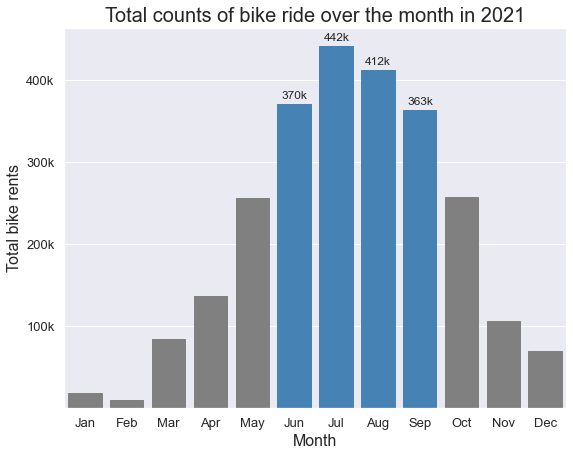

<Figure size 432x288 with 0 Axes>

In [17]:
sns.set_theme(style = 'darkgrid')
plot1 = sns.countplot(x= 'month', data = casual)

fig = plt.gcf()
fig.set_size_inches(9, 7)

months = [i[:3] for i in list(calendar.month_name[1:])]
for index in range(12):
    if index in range(5,9):
        plot1.patches[index].set_color('steelblue')
        plot1.annotate(str(plot1.patches[index].get_height())[:3] + "k", (plot1.patches[index].get_x()+0.1, plot1.patches[index].get_height()+7000))
    else:
        plot1.patches[index].set_color('gray')

plt.xlabel('Month', fontsize = 16)
plt.ylabel('Total bike rents', fontsize = 16)
plt.title('Total counts of bike ride over the month in 2021', fontdict = {'fontsize': 20})
plt.yticks([100000,200000,300000,400000],['100k','200k','300k','400k'], fontsize = 13)
plt.xticks(range(0,12), months, fontsize = 13)
plt.show()
plt.clf()


Here, I found that the rent frequencies by casual users spiked during **Summer** in Chicago (June, July, August).

In [18]:
casual_weekday = casual['weekday'].value_counts(sort = False)
casual_weekday

5    557994
6    481104
0    286373
3    286064
4    364075
2    278948
1    274388
Name: weekday, dtype: int64

In [19]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

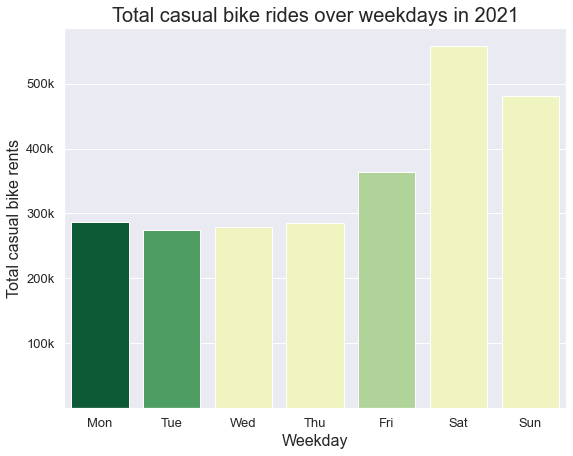

<Figure size 432x288 with 0 Axes>

In [20]:
plot3 = sns.countplot(x='weekday'
                    , data = casual
                    ,palette=colors_from_values(casual_weekday.values, 'YlGn')
                    )

fig = plt.gcf()
fig.set_size_inches(9, 7)

weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.xlabel('Weekday', fontsize = 16)
plt.ylabel('Total casual bike rents', fontsize = 16)
plt.title('Total casual bike rides over weekdays in 2021', fontdict = {'fontsize': 20})
plt.yticks([100000,200000,300000,400000,500000],['100k','200k','300k','400k', '500k'], fontsize = 13)
plt.xticks(range(0,7), weekday, fontsize = 13)
plt.show()
plt.clf()

Here, it is clear that casual users tends to rent a bike more by the weekend. On Saturday, there are twice as many bike rents as on Tuesday. 

In [21]:
pd.crosstab(casual.month
            , casual.rideable_type
            , normalize='all'
            , margins = True
).round(4)*100

rideable_type,classic_bike,docked_bike,electric_bike,All
month,,,,
1,0.33,0.08,0.31,0.72
2,0.23,0.05,0.13,0.40
3,1.80,0.62,0.90,3.32
4,2.80,0.98,1.63,5.40
5,4.90,1.71,3.54,10.16
6,7.44,2.04,5.17,14.66
7,9.55,2.28,5.65,17.48
8,9.09,1.78,5.44,16.32
9,7.73,1.40,5.26,14.39


The cross table shows that casual users use classic bike the most, followed by electric bike then docked bike. It is important to note that even though the surge of demands for bikes spike in *July*, the classic bikes rent drops faster than electric bike after *September*. I suppose this has something to do with the weather (Winter).  

Now, let's move on to analyze member data set

In [22]:
member['month'].value_counts()

9     392228
8     391661
7     380349
10    373984
6     358912
5     274715
11    253027
4     200624
12    177802
3     144462
1      78715
2      39491
Name: month, dtype: int64

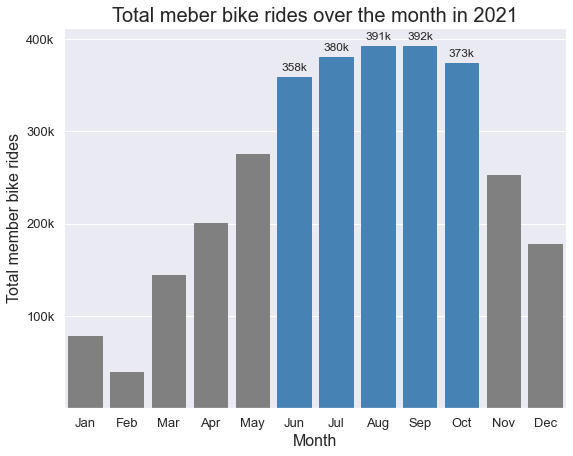

<Figure size 432x288 with 0 Axes>

In [23]:
plot4 = sns.countplot(x= 'month', data = member)

fig = plt.gcf()
fig.set_size_inches(9, 7)

months = [i[:3] for i in list(calendar.month_name[1:])]
for index in range(12):
    if index in range(5,10):
        plot4.patches[index].set_color('steelblue')
        plot4.annotate(str(plot4.patches[index].get_height())[:3] + "k", (plot4.patches[index].get_x()+0.1, plot4.patches[index].get_height()+7000))
    else:
        plot4.patches[index].set_color('gray')

plt.xlabel('Month', fontsize = 16)
plt.ylabel('Total member bike rides', fontsize = 16)
plt.title('Total meber bike rides over the month in 2021', fontdict = {'fontsize': 20})
plt.yticks([100000,200000,300000,400000],['100k','200k','300k','400k'], fontsize = 13)
plt.xticks(range(0,12), months, fontsize = 13)
plt.show()
plt.clf()


This chart shows that members use Cyclistics more over the Jun to Oct period (Summer to mid Fall).

I notice that this pattern is also presented with casual electric bike rents, so I'd decided to visualize it.

In [24]:
casual_elec = casual[casual['rideable_type'] == 'electric_bike']


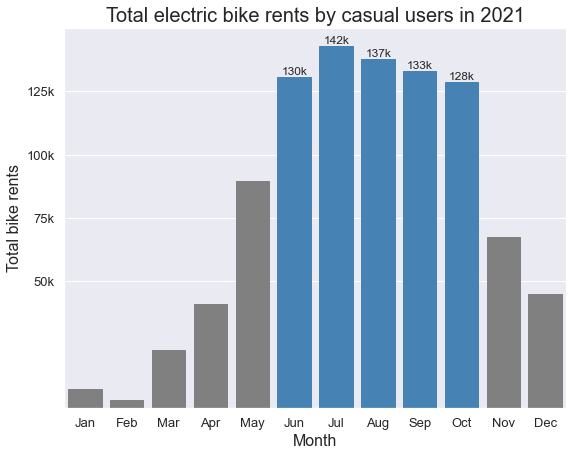

<Figure size 432x288 with 0 Axes>

In [25]:
plot5 = sns.countplot(x= 'month', data = casual_elec)

fig = plt.gcf()
fig.set_size_inches(9, 7)

months = [i[:3] for i in list(calendar.month_name[1:])]
for index in range(12):
    if index in range(5,10):
        plot5.patches[index].set_color('steelblue')
        plot5.annotate(str(plot5.patches[index].get_height())[:3] + "k", (plot5.patches[index].get_x()+0.1, plot5.patches[index].get_height()+1000))
    else:
        plot5.patches[index].set_color('gray')

plt.xlabel('Month', fontsize = 16)
plt.ylabel('Total bike rents', fontsize = 16)
plt.title('Total electric bike rents by casual users in 2021', fontdict = {'fontsize': 20})
plt.yticks([50000,75000,100000, 125000],['50k','75k','100k','125k'], fontsize = 13)
plt.xticks(range(0,12), months, fontsize = 13)
plt.show()
plt.clf()



Here, I have a theory that casual electric biker share a familiar behavior with members of Cyclistic. Unfortunately, the data set does not contain user ID to check if any casual user uses Cyclistic more than 1 time. However, I had decided to plot the demands for electric bikes over the weekday to further support my theory.

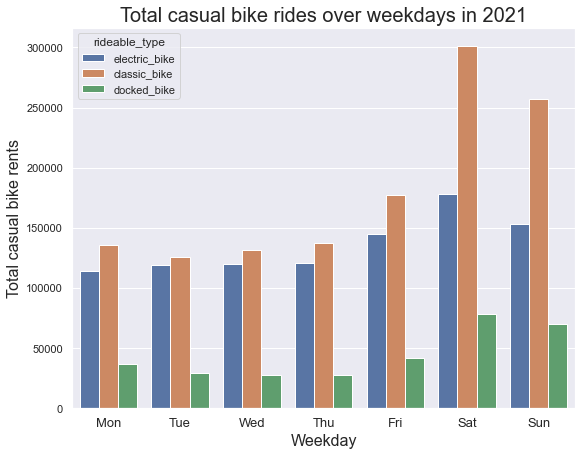

<Figure size 432x288 with 0 Axes>

In [26]:
plot6 = sns.countplot(x='weekday'
                    , data = casual
                    , hue = 'rideable_type'
                    )

fig = plt.gcf()
fig.set_size_inches(9, 7)

weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.xlabel('Weekday', fontsize = 16)
plt.ylabel('Total casual bike rents', fontsize = 16)
plt.title('Total casual bike rides over weekdays in 2021', fontdict = {'fontsize': 20})
plt.xticks(range(0,7), weekday, fontsize = 13)
plt.show()
plt.clf()

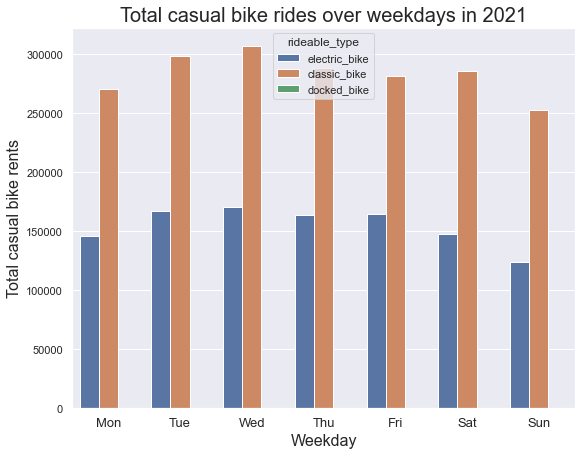

<Figure size 432x288 with 0 Axes>

In [27]:
plot7 = sns.countplot(x='weekday'
                    , data = member
                    , hue = 'rideable_type'
                    )

fig = plt.gcf()
fig.set_size_inches(9, 7)

weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.xlabel('Weekday', fontsize = 16)
plt.ylabel('Total casual bike rents', fontsize = 16)
plt.title('Total casual bike rides over weekdays in 2021', fontdict = {'fontsize': 20})
plt.xticks(range(0,7), weekday, fontsize = 13)
plt.show()
plt.clf()

In [28]:
member['weekday'].value_counts()

2    477156
1    465509
3    451520
4    446423
5    433041
0    416204
6    376117
Name: weekday, dtype: int64

Notice that the boost of casual demands for bikes during the weekend are mostly by classic bike users. On the other hand, electric bike demands stayed consistent (even though there is still a boost during the weekend). I believe that casual electric bikers are the most potential group to convert to members.

In [29]:
pd.crosstab(member.month
            , member.rideable_type
            , normalize='all'
            , margins = True
).round(4)*100

rideable_type,classic_bike,docked_bike,electric_bike,All
month,,,,
1,1.74,0.0,0.82,2.57
2,0.96,0.0,0.33,1.29
3,3.49,0.0,1.22,4.71
4,4.69,0.0,1.85,6.54
5,6.04,0.0,2.92,8.96
6,8.05,0.0,3.66,11.71
7,8.66,0.0,3.75,12.41
8,8.91,0.0,3.87,12.77
9,8.70,0.0,4.09,12.79


Classic bike is still the most demanded rideable type, followed by electric bike. What's more interesting that members do not use docked bike at all (there is only 1 record in January). More over, the demands for electric bike spread evenly over June to December (peaked in October) and the demands for classic bike peaked in August.


Let's plot the route, or the distance between the start_station and end_station, of casual and member users. This might reveal about the habit of the two users. 

First, I will need to remove unwanted rows (no start/end station or the start station = end station) 

In [30]:
mem_route = member.drop(member.columns.difference(['start_station_id','end_station_id','start_lat','start_lng','end_lat','end_lng']),axis=1)
cas_route = casual.drop(casual.columns.difference(['start_station_id','end_station_id','start_lat','start_lng','end_lat','end_lng']),axis=1)

In [31]:
#Remove no start/end records
mem_route.dropna(inplace = True)
cas_route.dropna(inplace = True)

In [32]:
#Remove start = end records
member_no_dis = mem_route[(mem_route['start_station_id'] == mem_route['end_station_id'])]
mem_route.drop(member_no_dis.index, inplace=True)

casual_no_dis = cas_route[(cas_route['start_station_id'] == cas_route['end_station_id'])]
cas_route.drop(casual_no_dis.index, inplace = True)

In [33]:
#Lets group the route together
casual_route_gr = cas_route.groupby(by=['start_station_id', 'end_station_id'])
member_route_gr = mem_route.groupby(by=['start_station_id','end_station_id'])


In [34]:
#Filter only the most used route (>200 repetitions)
fam_casual_route_bool = casual_route_gr.size() > 200
fam_cas_route = casual_route_gr.first()[fam_casual_route_bool]

In [35]:
fam_mem_route_bool = member_route_gr.size() > 200
fam_mem_route = member_route_gr.first()[fam_mem_route_bool]

In [36]:
fam_cas_route.drop(fam_cas_route.columns.difference(['start_lat','start_lng','end_lat','end_lng','dis']),axis=1,inplace=True)
fam_mem_route.drop(fam_mem_route.columns.difference(['start_lat','start_lng','end_lat','end_lng','dis']),axis=1,inplace=True)

In [37]:
fam_mem_route['cnt'] = member_route_gr.size()[fam_mem_route_bool]
fam_cas_route['cnt'] = casual_route_gr.size()[fam_casual_route_bool]


In [38]:
fam_mem_route['start_lng'].max()

-87.580715

In [39]:

fig = go.Figure()

for i in range(len(fam_mem_route)):
    fig.add_trace(
        go.Scattergeo(
            lon = [fam_mem_route['start_lng'][i], fam_mem_route['end_lng'][i]],
            lat = [fam_mem_route['start_lat'][i], fam_mem_route['end_lat'][i]],
            mode = 'lines',
            line = dict(width = 1,color = 'red'),
            opacity = float(fam_mem_route['cnt'][i]) / float(fam_mem_route['cnt'].max()),
        )
    )

fig.update_layout(
    title_text = "Members' most used routes (>200 repetitions)",
    showlegend = False,
    geo = dict(
        center = dict(
            lat = fam_mem_route['start_lat'].mean(),
            lon = fam_mem_route['start_lng'].mean(),
        ),
        scope = 'usa',
        projection_type = 'albers usa',
        showland = True,
        showsubunits = True,
        projection = dict (
            scale = 100
        )
    ),
)

fig.show()

In [40]:

fig2 = go.Figure()

for i in range(len(fam_cas_route)):
    fig2.add_trace(
        go.Scattergeo(
            lon = [fam_cas_route['start_lng'][i], fam_cas_route['end_lng'][i]],
            lat = [fam_cas_route['start_lat'][i], fam_cas_route['end_lat'][i]],
            mode = 'lines',
            line = dict(width = 1,color = 'blue'),
            opacity = float(fam_cas_route['cnt'][i]) / float(fam_cas_route['cnt'].max()),
        )
    )

fig2.update_layout(
    title_text = "Casual users' most used routes (>200 repetitions)",
    showlegend = False,
    geo = dict(
        center = dict(
            lat = fam_cas_route['start_lat'].mean(),
            lon = fam_cas_route['start_lng'].mean(),
        ),
        scope = 'usa',
        projection_type = 'albers usa',
        showland = True,
        showsubunits = True,
        projection = dict (
            scale = 100
        )
    ),
)

fig2.show()

I notice that the routes used by members are more scattered and longer than casuals'. This combines with the fact that the use-rate during the weekday by members are very consistent reveals that they are propably **citizens** who use Cyclistics to travel from **home to the city (for work, grocery, etc.) everday**. More over, there are more repeated routes (about 1600) in comparison with casuals (about 600).

On the other hand, casuals' routes are more compact and closer. This and the fact that casual use-rate spike during **weekend** and **Summer** (vacation time) reveals that casual users might be mostly **tourists, or guests**. They want to use Cyclistics to move around **center of the city**.

# PHASE 6: SHARE
## Answers to original questions:
* How do annual members and casual riders use Cyclistic bikes differently?
  * Annual members: **Citizens** who use Cyclistics **oftenly** over the week to travel long distance, probably **from home to work**.
  * Casual users: **Tourists** who use Cyclistics **more in the weekend** to travel short distance, mostly in the centre of the city. Moreover, there is a chance that *casual electric biker* share familiar behavior with *members*, although I need more data to conclude on this.

## Suggestions:
* I would suggest that **to convert casual users to members**, the marketing team should focus on promoting special promotions for **the weekend** or during **Summer** (which when casual's use-rate spiked). I would suggest the promotions to focus on vacation or hanging out. Moreover, they should also have special promotions for *electric bikers* who might be the the most potential user type to turn into a member.
 